# K-Means clustering

In deze opdracht ga je K-Means clustering implementeren. De dataset is bijgeleverd en wordt voor je ingeladen.

In [1]:
# misc data processing imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pickle
import seaborn as sns

# classifier & testing
from sklearn.cluster import KMeans

# for overwriting plots
from IPython import display
import time

## 1. Initialisatie

  * Activeer de onderstaande cel. Deze code hoef je niet aan te passen, maar kun je later aanroepen om het trainen en het resultaat van K-Means te visualiseren.

In [2]:
colors = ['blue', 'red', 'green', 'cyan', 'orange', 'purple', 'black', 'pink']

def plot_KMeans(X, centroids, labels, N=None):
    """Plot an iteration of the K-Means algorithm.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Train data
    
    centroids : 
        array-like, shape = [n_clusters, n_features]
        Cluster means
        
    labels : 
        array-like, shape = [n_samples,] 
        Current cluster assignments for each train data sample
        
    N : int
        Current iteration
    """
    # check input
    if len(centroids) > len(colors):
        raise ValueError("Om te kunnen plotten moet het aantal clusters kleiner zijn dan 8.")
    
    # clear previous plot
    plt.clf()    
    display.clear_output(wait=True)
    time.sleep(0.5)
    
    # plot data points & centroid per label
    for label, color in enumerate(colors[:len(centroids)]):
        plt.scatter(X[labels == label,0], X[labels == label,1], c=color, alpha=0.5)
        plt.scatter(centroids[label,0], centroids[label,1], c=color, marker='*', s=150)
    
    # add title
    if N:
        plt.title("Iteration " + str(N))

    plt.show()

## 2. Data laden

Hieronder wordt een ongelabelde dataset geladen. 

In [3]:
X = pickle.load(open('blobs.p', 'rb'))

  * Hoeveel samples zitten er in de dataset? En hoeveel features heeft elk sample?

In [11]:
X.shape
X[:0]

array([], shape=(0, 2), dtype=float64)

  * Plot de dataset met behulp van `plt.scatter()`. Hoeveel clusters denk je te zien?  

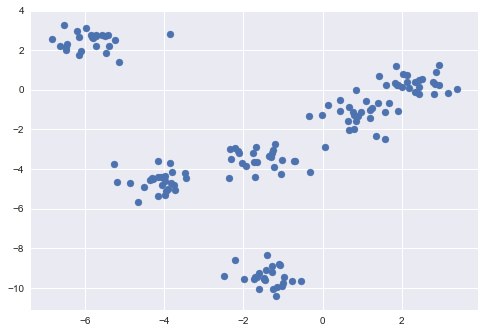

In [14]:
plt.scatter(X[:,0],X[:,1])

## 3. Implementeer K-means

  * Implementeer nu K-Means:
      * gebruik K=6
      * initialiseer de clusters met unieke, willekeurige samples uit de dataset
      * wanneer tijdens het trainen een cluster leeg raakt, stop er dan een willekeurige sample uit de dataset in.
  
  * Gebruik de functie `plot_KMeans()` om het trainen en de uiteindelijke clustering te visualiseren.
  * Wat gebeurt er als je het algoritme meerdere keren draait? Worden altijd dezelfde zes clusters gevonden?

In [39]:
n_cluster = 6
centroids = []

centroids = np.array(random.sample(list(X),6))
print(centroids)
dataLen=len(X)
#for instance in X:
   # print(instance)
labels = np.zeros(len(X))
prev_labels = np.ones(len(X))

N=0
while not np.array_equal(labels,prev_labels)


[[-5.98110091  3.13613778]
 [-4.08676859 -4.38898122]
 [ 2.83261921  0.26728254]
 [-6.20390511  2.96016961]
 [-2.30204923 -3.51919064]
 [-1.94193893 -3.85774954]]


## 4. K-Means uit SK-Learn

  * Maak K-Means aan door middel van SK-Learn. Kies de instellingen `n_clusters=6`, en `init='k-means++'`

In [20]:
kmeans = KMeans(n_clusters=6, init='k-means++').fit(X)

  * Train K-means op de dataset en haal de uiteindelijke labels op door middel van `fit_predict()`.

In [42]:
kmeans.fit_predict(X)

  * Haal de geleerde cluster centers (centroids) op uit K-Means.

In [44]:
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

  * Plot de data, centroids en labels.
  * Wat gebeurt er als je het algoritme meerdere keren draait? Worden altijd dezelfde zes clusters gevonden?

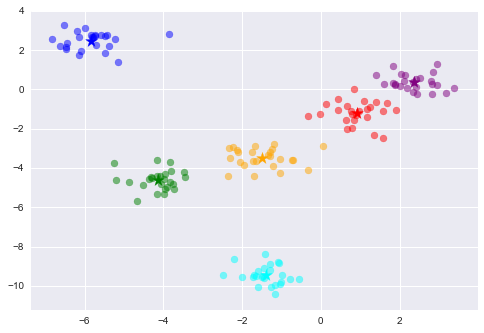

In [45]:
plot_KMeans(X, centroids, labels, N=None)

## 5. Elbow-method

* Roep K-Means uit SK-Learn herhaaldelijk aan met `K = 1...15`
* Sla bij elke waarde van `K` de som op van de afstanden tussen elk punten en hun cluster (ook wel *inertia* of *distortion* genoemd)
* Plot de distortions voor elke waarde van `K`. Wat zou een optimale waarde voor `K` zijn?

In [74]:
max_k = 15
som = []
for k in range(max_k):
    kmeans = KMeans(n_clusters=k+1, init='k-means++').fit(X)
    som.append(kmeans.inertia_)

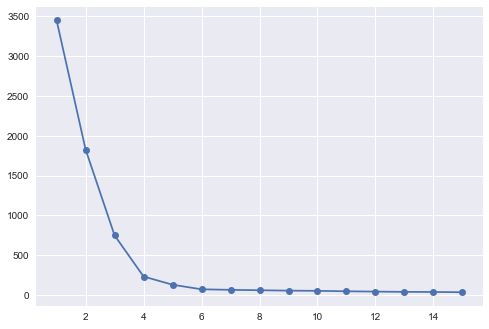

In [75]:
plt.plot(range(1,16), som, marker='o')